In [1]:
import pandas as pd
import gzip
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')



https://www.kaggle.com/code/hoshi7/goodreads-analysis-and-recommending-books
    

In [6]:
dfBooks = pd.read_csv('A:\OneDrive\Documents\Master project cluster\df_books_romance.csv.gz')
dfBooks.head()

,book_id,title_without_series,book_description,publication_year,publisher,ratings_count,book_average_rating,cover_page,book_url,is_ebook,num_pages
0,29074693,"Prowled Darkness (Dante's Circle, #7)",NaN,NaN,NaN,149,4.23,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/29074693-p...,True,NaN
1,3209316,Emma,The funny and heartwarming story of a young la...,2005.0,Brilliance Audio,42,3.99,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/3209316-emma,False,544.0
2,30838933,"Guardian Cougar (Finding Fatherhood, #2)","In the Finding Fatherhood series, these shifte...",NaN,NaN,139,4.31,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/30838933-g...,True,NaN
3,27419760,Wedding Girl,You've Got Mailmeets Julie & Juliain the new f...,NaN,NaN,167,3.98,https://images.gr-assets.com/books/1457306424m...,https://www.goodreads.com/book/show/27419760-w...,True,NaN
4,20566082,"A Kitty in the Lion's Den (Sweet Water, #3)",Maverick's story.,NaN,NaN,53,3.79,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/20566082-a...,True,NaN


In [9]:
dfReviews = pd.read_csv('A:\OneDrive/Documents/Master project cluster/df_reviews_romance.csv.gz')
dfReviews.head()

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,1893,5347a776a1703b823ce029d68ae98275,5,** spoiler alert ** \n So the other day Elizab...,155,4
1,72fb0d0087d28c832f15776b0d936598,17939501,719711cc71eec0bb54d2d97322c0e11b,5,"It is very hard to believe this is all true, b...",0,0
2,72fb0d0087d28c832f15776b0d936598,15706923,6a870a66f732183b60214d57fa553093,2,Ehhhhhh. \n Really nothing to rave about. It w...,0,0
3,72fb0d0087d28c832f15776b0d936598,7840190,f73a70f64564d4a8f4cfb2d2e9d5836f,4,Enjoyable read! I liked that Connie is not a t...,0,0
4,72fb0d0087d28c832f15776b0d936598,15463724,547aeff3c7ee5b4a39a93cd2a720b001,4,There are definitely too many books lately wit...,0,0


In [10]:
dfBooks.isna().sum()

book_id                     0
title_without_series        0
book_description        23648
publication_year        79857
publisher               98826
ratings_count               0
book_average_rating         0
cover_page                  0
book_url                    0
is_ebook                    0
num_pages               98762
dtype: int64

In [11]:
dfReviews.isna().sum()

user_id           0
book_id           0
review_id         0
rating            0
review_text    3130
n_votes           0
n_comments        0
dtype: int64

In [12]:
dfReviews['review_text'].fillna("No review", inplace=True)

In [13]:
dfReviews.isna().sum()

user_id        0
book_id        0
review_id      0
rating         0
review_text    0
n_votes        0
n_comments     0
dtype: int64

In [14]:
dfReviews = dfReviews.rename(columns={"user_id": "reviewer_id"})

In [15]:
dfMerged = pd.merge(dfBooks, dfReviews, on="book_id")
dfMerged

,book_id,title_without_series,book_description,publication_year,publisher,ratings_count,book_average_rating,cover_page,book_url,is_ebook,num_pages,reviewer_id,review_id,rating,review_text,n_votes,n_comments
0,29074693,"Prowled Darkness (Dante's Circle, #7)",NaN,NaN,NaN,149,4.23,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/29074693-p...,True,NaN,d749b5648a68f322b90f58bc9d557a97,92227ab9fc521679718edb6fd563af94,5,"Fitting end to series \n What a sweet, sexy st...",0,0
1,29074693,"Prowled Darkness (Dante's Circle, #7)",NaN,NaN,NaN,149,4.23,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/29074693-p...,True,NaN,dd471527f0d2071526eb593a47d6538c,886806bbcf97f5c95ec9bf5d112ae9bf,4,Nice Wrap Up \n Have enjoyed this series very ...,0,0
2,29074693,"Prowled Darkness (Dante's Circle, #7)",NaN,NaN,NaN,149,4.23,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/29074693-p...,True,NaN,6836ada2b11b919e6705b783c8046a5d,683ce1f955c6efb7d910190dbb6eb1b3,5,Malik left Eliana behind thinking that there w...,1,0
3,29074693,"Prowled Darkness (Dante's Circle, #7)",NaN,NaN,NaN,149,4.23,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/29074693-p...,True,NaN,980704294150193e809f9467125db1ae,cc96fe93e2a2c29e11e79b29ce736e02,5,Fantastic End to a Wonderful Series \n Six hum...,0,0
4,3209316,Emma,The funny and heartwarming story of a young la...,2005.0,Brilliance Audio,42,3.99,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/3209316-emma,False,544.0,da13bcc8cfc339e415d928799e214c62,d8de0d6447a21aebfecf9203de5cc2b9,4,"1/2 \n My opinions of this work are two-fold, ...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446781,2685097,The Spaniard's Blackmailed Bride,"Blackmailed into marriage to save her family, ...",2007.0,Harlequin,112,3.42,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,False,192.0,b7a0f2b922281a2d25b45800090ad267,3c98fe0e7f26a5f59006de1908ee1ad4,1,Deceitful bitch heroine ruined the book! Can't...,0,8
3446782,2685097,The Spaniard's Blackmailed Bride,"Blackmailed into marriage to save her family, ...",2007.0,Harlequin,112,3.42,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/2685097-th...,False,192.0,bc9de3672ff3ca4df22861826e079a84,9d15a68a904f4ca46ef83c847d157ada,3,It's not often that the hero is the one who mi...,1,1
3446783,22017381,"101 Nights: Volume One (101 Nights, #1-3)","Volume One contains: ""Claimed,"" ""Tainted,"" and...",2014.0,Guerrilla Wordfare,70,4.37,https://images.gr-assets.com/books/1398621236m...,https://www.goodreads.com/book/show/22017381-1...,False,306.0,5629f7e45de30bedf7a7da25ed368439,b366b2f461de86f542c6bf08cdad5800,5,i was reading this individually then got a cha...,0,0
3446784,22017381,"101 Nights: Volume One (101 Nights, #1-3)","Volume One contains: ""Claimed,"" ""Tainted,"" and...",2014.0,Guerrilla Wordfare,70,4.37,https://images.gr-assets.com/books/1398621236m...,https://www.goodreads.com/book/show/22017381-1...,False,306.0,30501dfe76647597e85ac31915b3231d,30425399c4ffacfaa51351eb67d54f02,4,good story....wish there were more books to re...,0,0


The ebooks do not have num_pages, publisher or publisher date 

In [16]:
dfMerged['num_pages'].fillna(0, inplace=True)

In [17]:
dfMerged['book_description'].fillna("No description", inplace =True)
dfMerged['publication_year'].fillna(0, inplace=True)
dfMerged['publisher'].fillna("No publisher", inplace=True)

In [18]:
dfMerged.isna().sum()

book_id                 0
title_without_series    0
book_description        0
publication_year        0
publisher               0
ratings_count           0
book_average_rating     0
cover_page              0
book_url                0
is_ebook                0
num_pages               0
reviewer_id             0
review_id               0
rating                  0
review_text             0
n_votes                 0
n_comments              0
dtype: int64

In [20]:
dfMerged.shape[0]


3446786

In [21]:
dfMerged.shape[1]

17

In [26]:
dfMerged.head()


,index,book_id,title_without_series,book_description,publication_year,publisher,ratings_count,book_average_rating,cover_page,book_url,is_ebook,num_pages,reviewer_id,review_id,rating,review_text,n_votes,n_comments
8,3090008,7417332,Virginia - The Vampires Mistress - Vamp Romance,No description,0.0,No publisher,23,1.61,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/7417332-vi...,True,0.0,932c490d80bd4b2f945c7aaf0e67e20e,7ab908d3be30a5e40d8eb2870f169261,1,This was the most horrifically bad novella I h...,0,0
9,3115532,21243248,Show No Mercy,**New improved version available in paperback*...,2014.0,Createspace,68,1.79,https://images.gr-assets.com/books/1410441377m...,https://www.goodreads.com/book/show/21243248-s...,False,246.0,ab18c51f117ab8362cb1ec1cb04ead51,9b636ef0d87616dbedc7bb1db87c9125,1,Plagiarized best-selling and incredibly talent...,2,0
10,3115540,21243248,Show No Mercy,**New improved version available in paperback*...,2014.0,Createspace,68,1.79,https://images.gr-assets.com/books/1410441377m...,https://www.goodreads.com/book/show/21243248-s...,False,246.0,a40326617455d5ca16c7ded9e4fbcc22,af38c3885930d4ea108b6f0e96cabdcd,1,Plagiarized sections of Hopeless by Colleen Ho...,11,1
11,3115539,21243248,Show No Mercy,**New improved version available in paperback*...,2014.0,Createspace,68,1.79,https://images.gr-assets.com/books/1410441377m...,https://www.goodreads.com/book/show/21243248-s...,False,246.0,64cf22ba02ea892c43e08d7514520927,29ae2a9d4c0eabbe7a6a26d28453effd,1,"What the hell is this book,It just went over m...",3,0
12,3115538,21243248,Show No Mercy,**New improved version available in paperback*...,2014.0,Createspace,68,1.79,https://images.gr-assets.com/books/1410441377m...,https://www.goodreads.com/book/show/21243248-s...,False,246.0,ba3c0794cd7f589cb2c06844b2396104,c942b38c63f1eb2b14a6be57587ee564,1,PLAGIARISM... Nuff said. Have no reading time ...,2,0


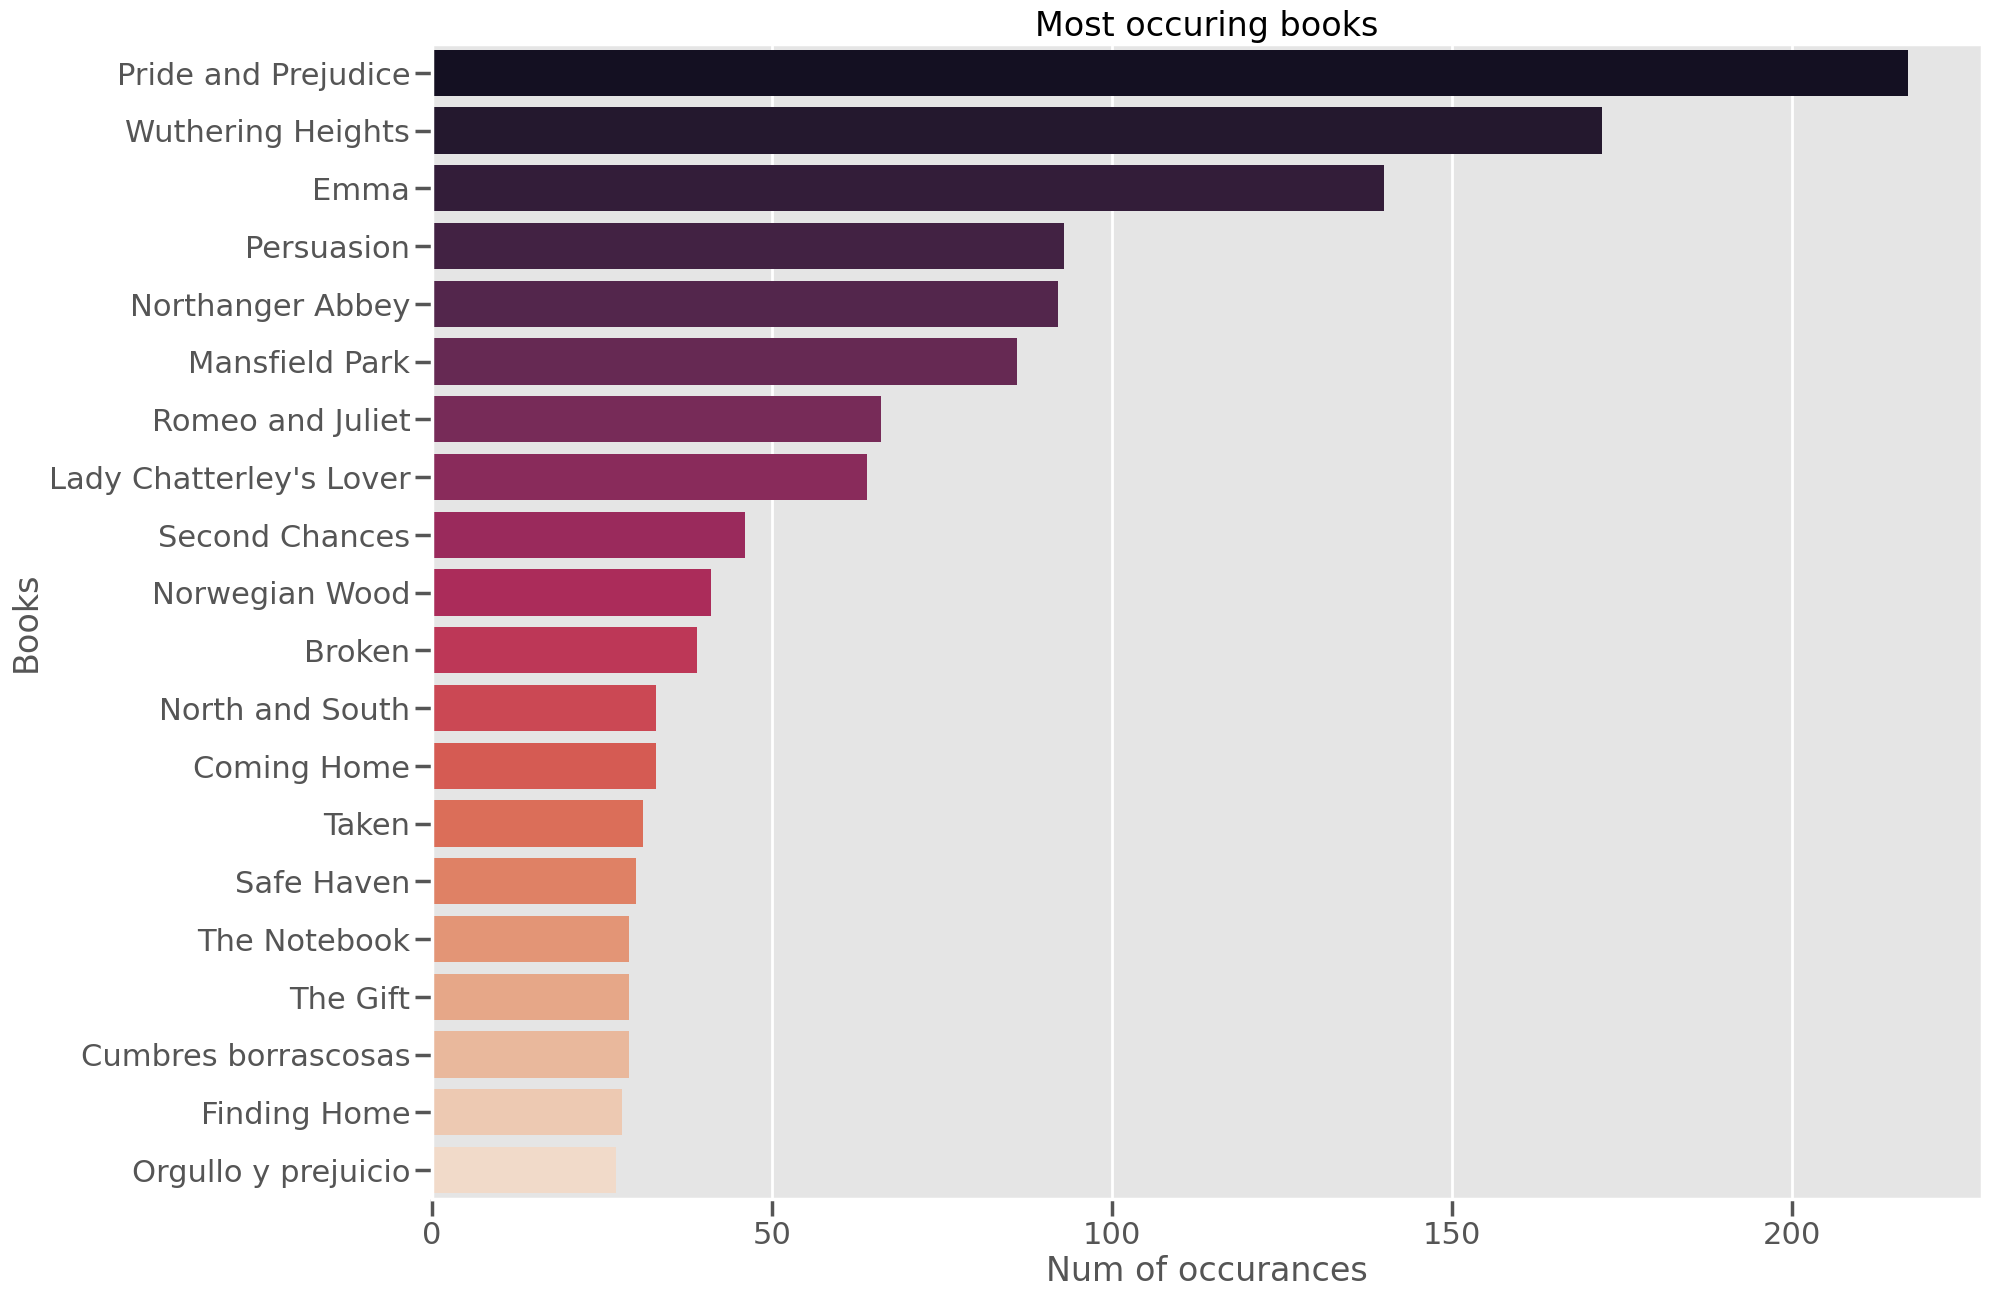

In [41]:
#without the reviews, the books that occur the most in dataset
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = dfBooks['title_without_series'].value_counts()[:20]
rating = dfBooks.book_average_rating[:20]
sns.barplot(x=books, y= books.index, palette = 'rocket')
plt.title("Most occuring books")
plt.xlabel("Num of occurances")
plt.ylabel("Books")
plt.show()

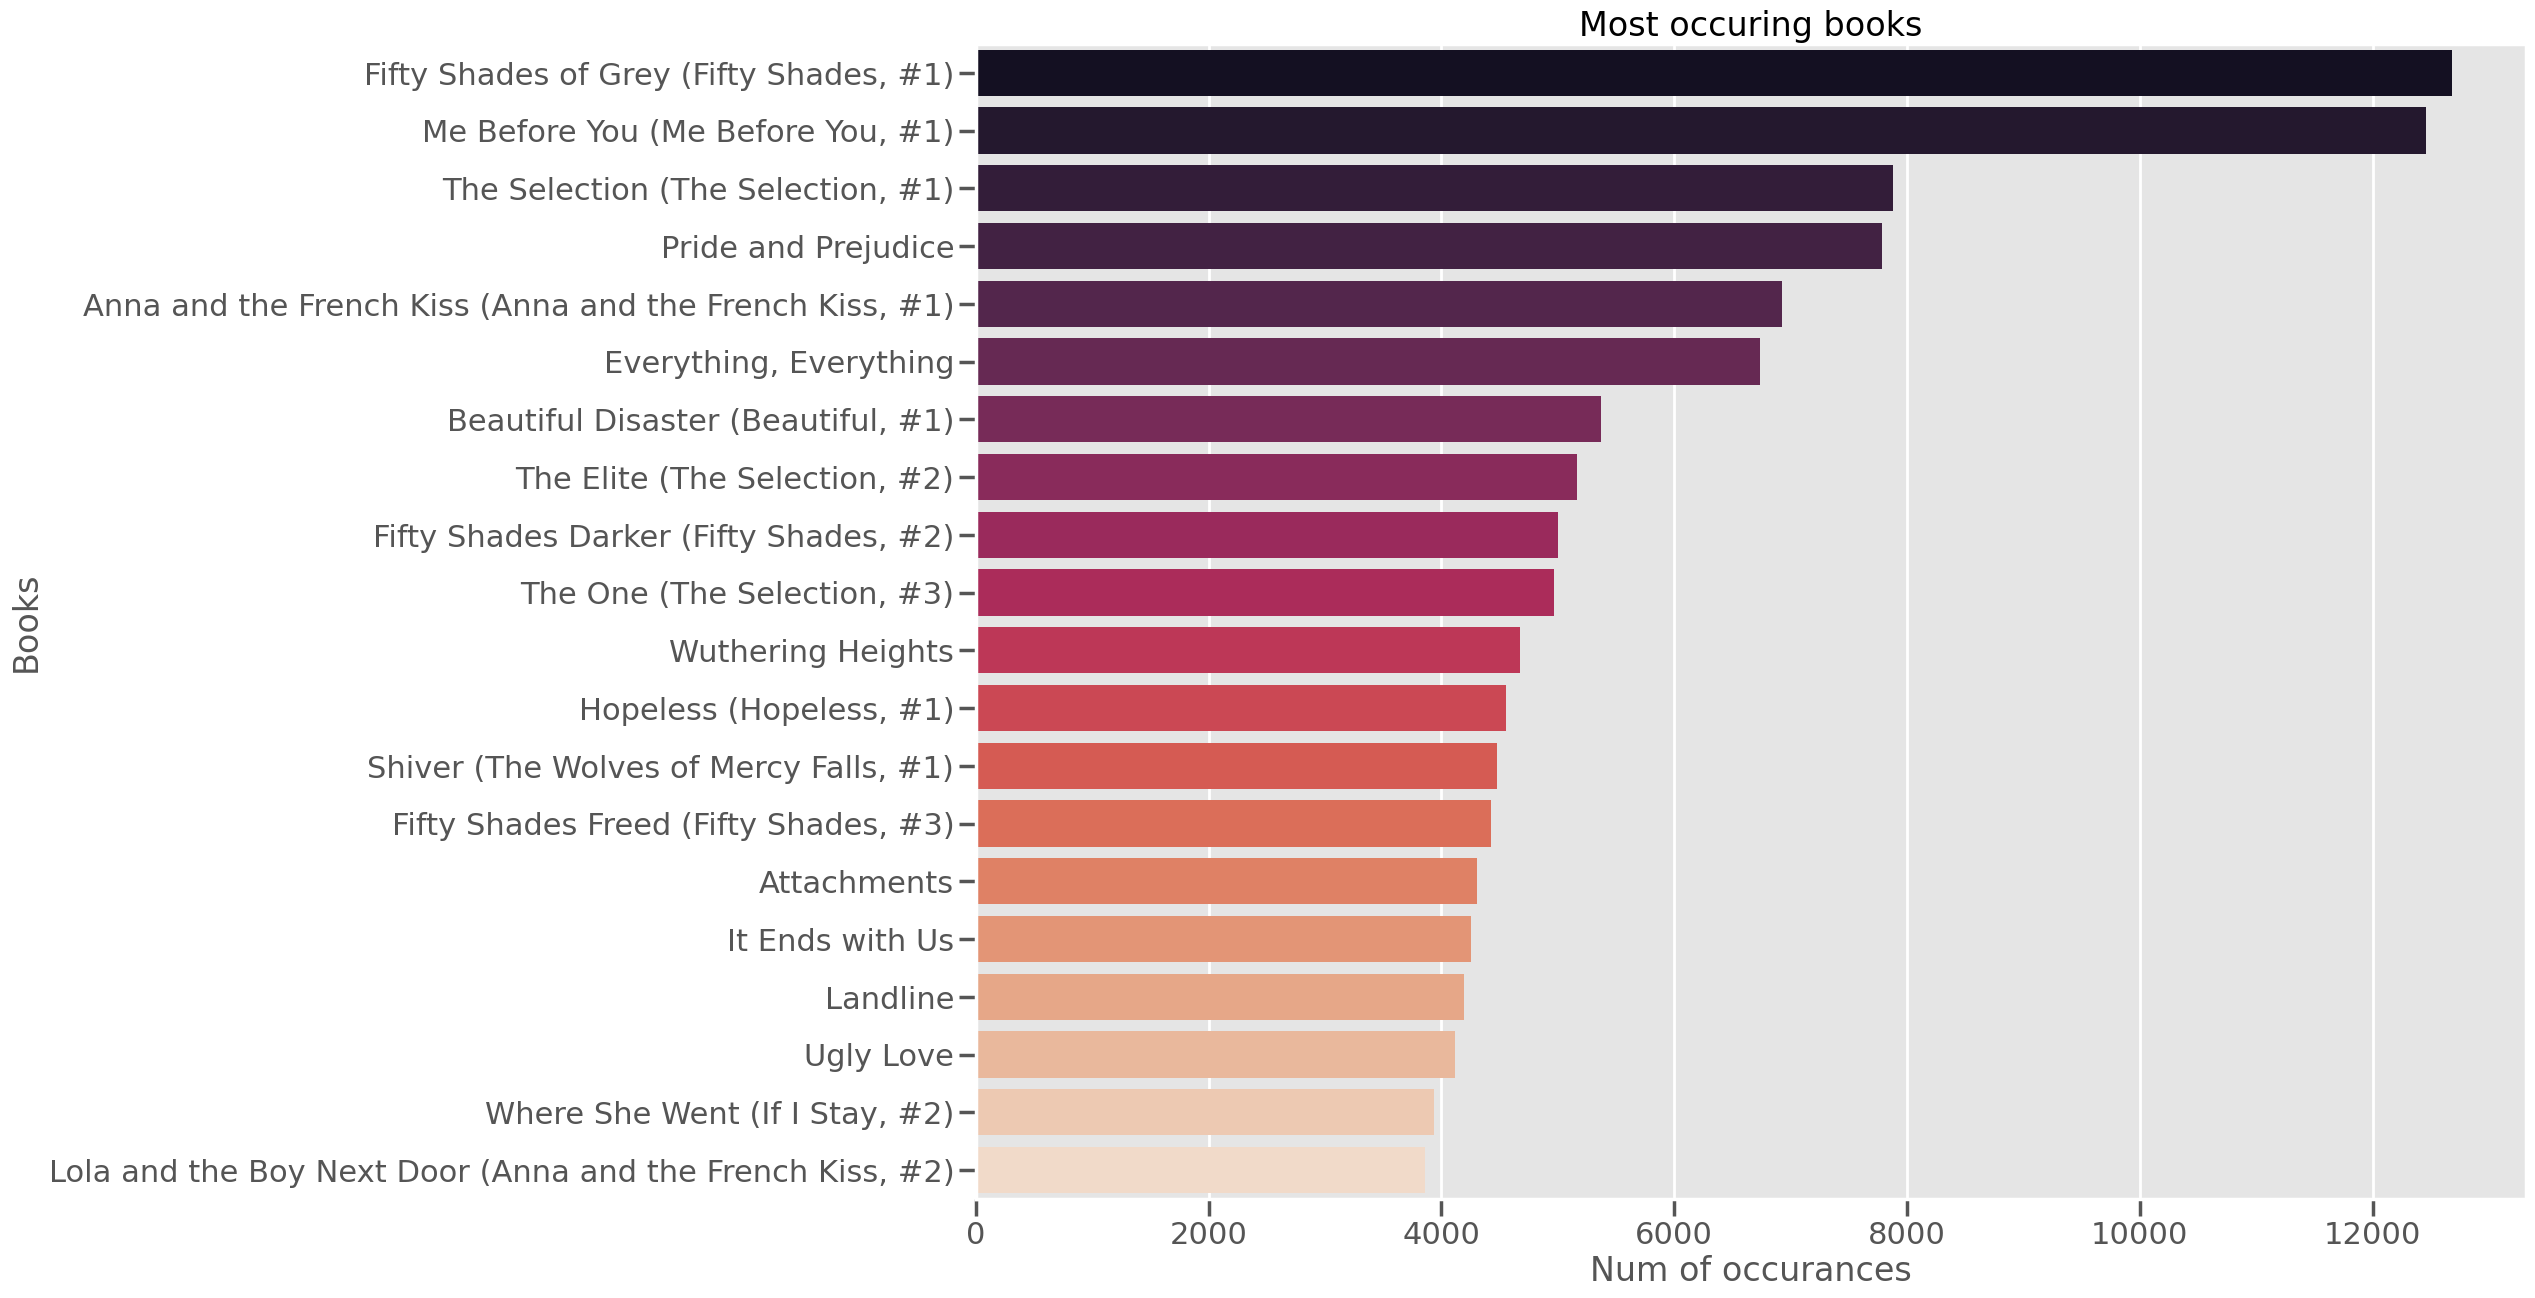

In [40]:
#with the reviews 
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = dfMerged['title_without_series'].value_counts()[:20]
rating = dfMerged.book_average_rating[:20]
sns.barplot(x=books, y= books.index, palette = 'rocket')
plt.title("Most occuring books")
plt.xlabel("Num of occurances")
plt.ylabel("Books")
plt.show()

<AxesSubplot:xlabel='ratings_count', ylabel='title_without_series'>

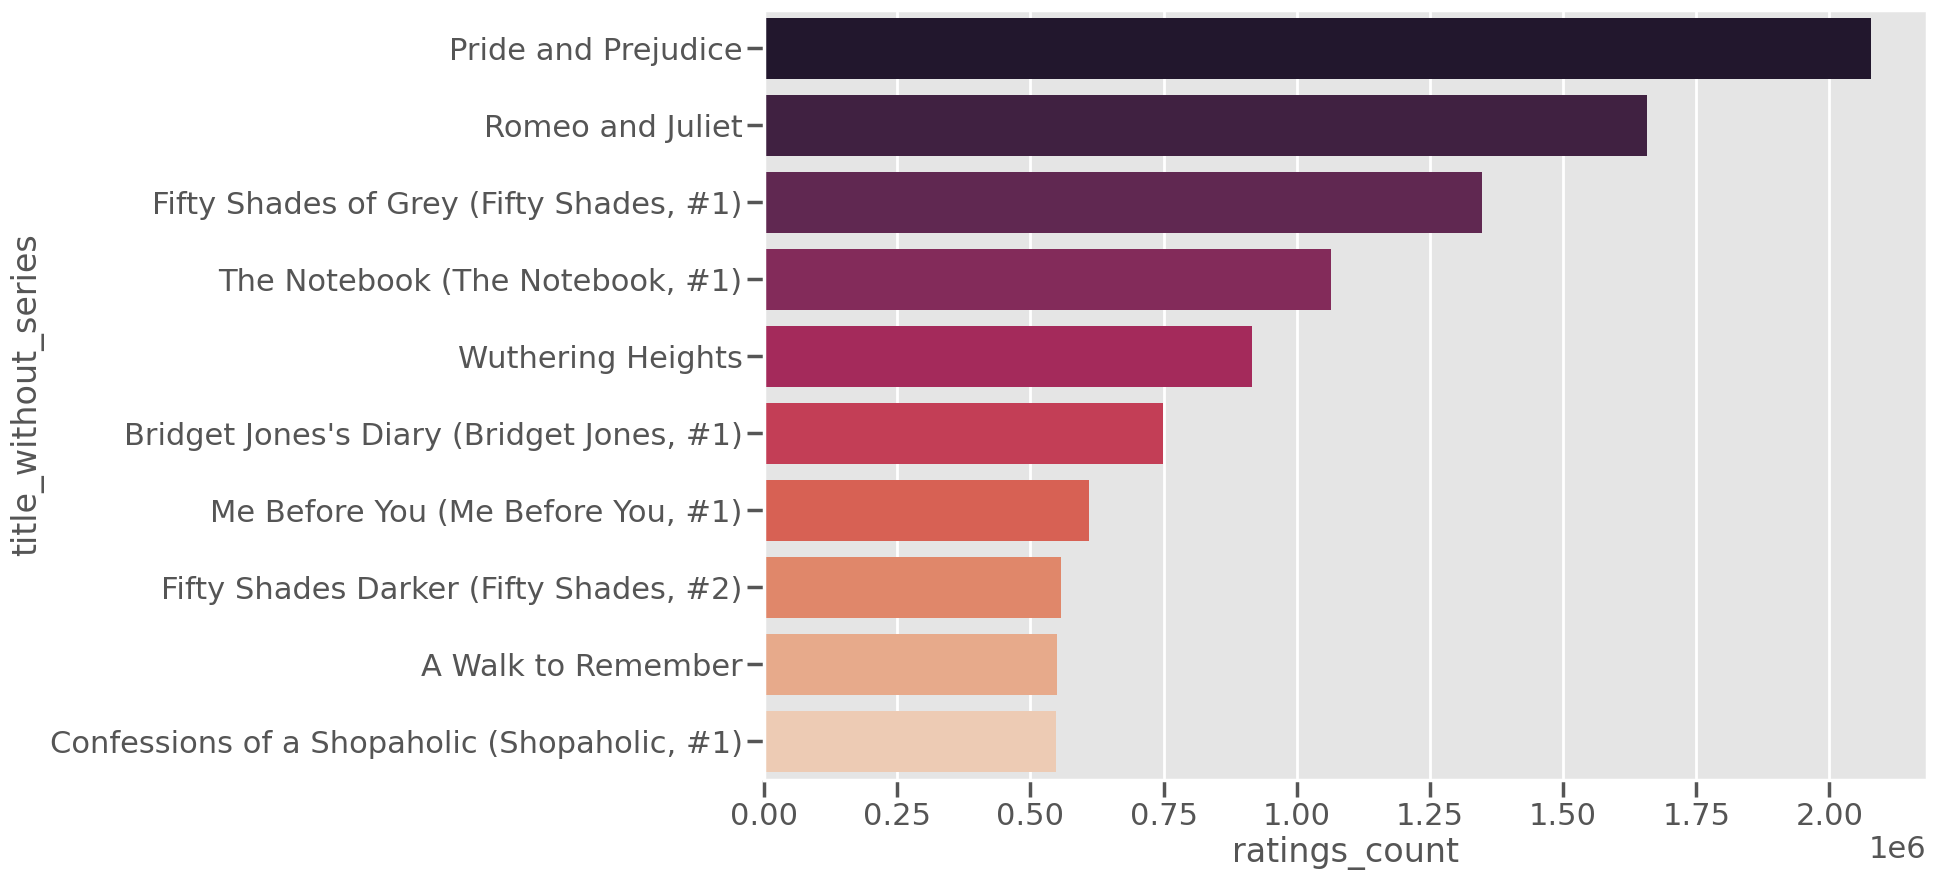

In [38]:
most_rated = dfBooks.sort_values('ratings_count', ascending = False).head(10).set_index('title_without_series')

plt.figure(figsize=(15,10))
sns.barplot(x = most_rated['ratings_count'], y = most_rated.index, palette='rocket')

In [45]:
dfBooks.columns

Index(['book_id', 'title_without_series', 'book_description',
       'publication_year', 'publisher', 'ratings_count', 'book_average_rating',
       'cover_page', 'book_url', 'is_ebook', 'num_pages'],
      dtype='object')

In [42]:


sns.set_context('talk')
most_books = dfBooks.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='rocket')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')



KeyError: 'authors'

In [22]:
import seaborn as sns#importing the seaborn library
import matplotlib.pyplot as plt#importing the matplot library
from sklearn.ensemble import RandomForestClassifier#importing the Random Forest classifier
from sklearn.model_selection import train_test_split#importing the Random Forest classifier
from sklearn.preprocessing import StandardScaler#importing the Standard Scalar
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report#importing the confusion matrix and classification report

In [23]:
top_ten_ratings=dfMerged[dfMerged['ratings_count']>1000]#getting the rows with most ratings
top_ten_ratings=top_ten_ratings.sort_values(by='ratings_count', ascending=False).head(10)#priting the sorted data
 
dfMerged=dfMerged.sort_values('book_average_rating').reset_index()#sorting the dataframe according to average rating

dfMerged=dfMerged.iloc[4:]
dfMerged.average_rating=dfMerged.book_average_rating.astype(float)#changing the type to float

dfMerged=dfMerged.iloc[4:]
dfMerged.num_pages=dfMerged.num_pages.astype(float)#changing the type to float

C:\Users\Sarah\AppData\Local\Temp\ipykernel_23436\3320872416.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfMerged.average_rating=dfMerged.book_average_rating.astype(float)#changing the type to float


In [24]:
df2=dfMerged.copy()
df2.loc[(df2['book_average_rating']>=0)&(df2['book_average_rating']<=1),'rating between']="between 0 and 1"#getting the rows with average rating between 0 and 1
df2.loc[(df2['book_average_rating']>1)&(df2['book_average_rating']<=2),'rating between']="between 1 and 2"#getting the rows with average rating between 1 and 2
df2.loc[(df2['book_average_rating']>2)&(df2['book_average_rating']<=3),'rating between']="between 2 and 3"#getting the rows with average rating between 2 and 3
df2.loc[(df2['book_average_rating']>3)&(df2['book_average_rating']<=4),'rating between']="between 3 and 4"#getting the rows with average rating between 3 and 4
df2.loc[(df2['book_average_rating']>4)&(df2['book_average_rating']<=5),'rating between']="between 4 and 5"#getting the rows with average rating between 4 and 5
df2.sort_values('book_average_rating')#sorting the dataframe
 
df_rating=pd.get_dummies(df2['rating between'])
df_ebook=pd.get_dummies(df2['is_ebook'])

feature=pd.concat([df_rating, df_ebook, df2['book_average_rating'], df2['ratings_count']], axis=1)

In [25]:
from sklearn.preprocessing import MinMaxScaler#importing the min max scalar
from sklearn import neighbors
 
minmax=MinMaxScaler()#creating instance of min max scalar
 
feature=minmax.fit_transform(feature) #fitting the feature to instance

 


C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
from sklearn.model_selection import train_test_split#importing the library for splitting the dataset
 
model=neighbors.NearestNeighbors(n_neighbors=8, algorithm='ball_tree')#creating the model


In [ ]:
model.fit(feature) #fitting the model

In [ ]:
dist, book_id=model.kneighbors(feature)#getting the id of the book

In [ ]:
def recommend_book(name):#defining function for book recom
    list=[]#creating a book list
    id=df2[df2['title']==name].index
    id=id[0]
    for books in book_id[id]:
        list.append(df2.loc[books].title)
    return list

In [ ]:
result=recommend_book('Emma')#finding a book suggestion
result#printing the result